## Loan Application Status Prediction

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

#### let's start with loading the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# check some basic statistical details 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observation:
    
    Out of 13 variables in train data, ther are 5 numeric varables and 8 are categorical variables.
    We can see presence of missing values in some variables.

In [7]:
# check total null value in dataset.
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Filling missing values

In [8]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["Property_Area"].fillna(df["Property_Area"].mode()[0],inplace=True)

In [9]:
#Find the missing values in Loan Amount Term to fill
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [10]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)

In [11]:
#Filling the Null values using the Median in LoanAmount
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

In [12]:
# Now, let's check again missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
# let's check data types of the each columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
# check no of rows and columns of dataset
df.shape

(614, 13)

### Feature Engineering

In [15]:
df['Total_Income']=df["ApplicantIncome"]+df['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

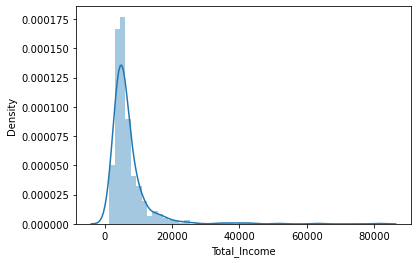

In [16]:
sns.distplot(df["Total_Income"])

In [17]:
df['Total_Income_log']=np.log(df["Total_Income"])

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

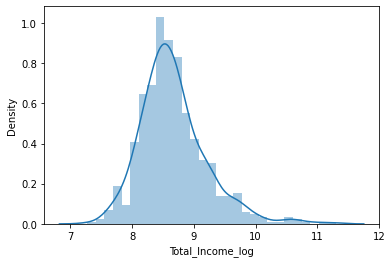

In [18]:
sns.distplot(df["Total_Income_log"])

In [19]:
df['EMI']=df["LoanAmount"]/df['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Density'>

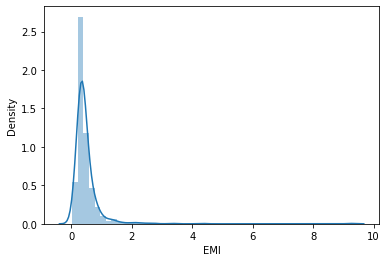

In [20]:
sns.distplot(df["EMI"])

In [21]:
#Multiplying by 1000 to make the units equal 
df['Balance Income']=df["Total_Income"]-(df['EMI']*1000)

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

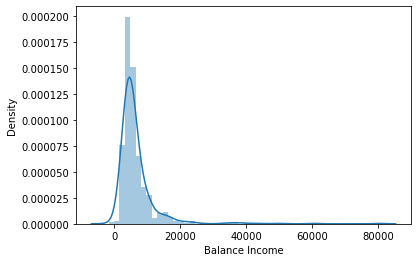

In [22]:
sns.distplot(df["Balance Income"])

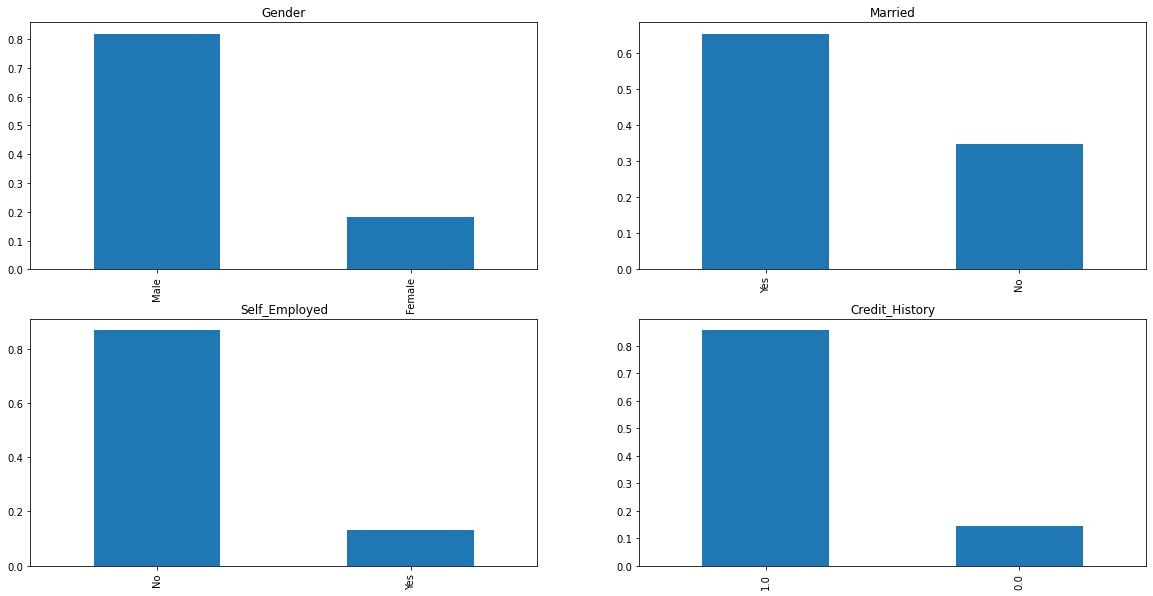

In [23]:
#Categorical Features

plt.figure(1)
plt.subplot(221)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

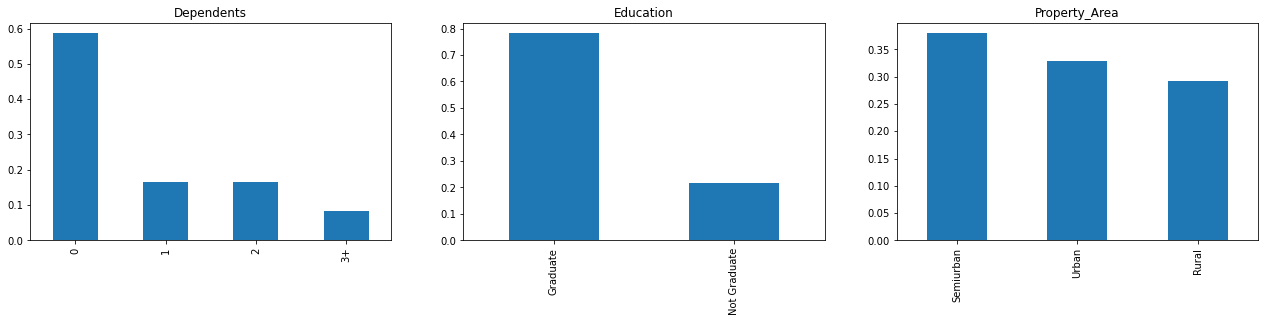

In [24]:
# Ordinal Variables
plt.figure(1)
plt.subplot(131)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(22,4),title= 'Dependents')

plt.subplot(132)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

#### Distribution plots
Let's plot our independant features with target variables.

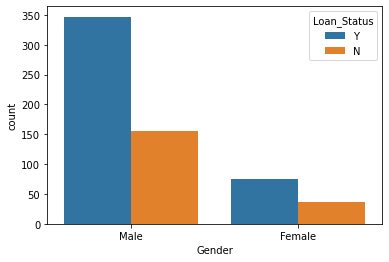

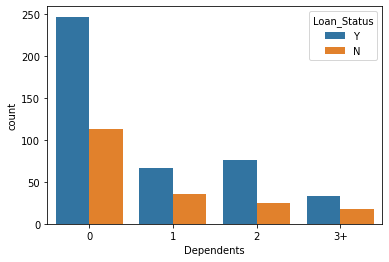

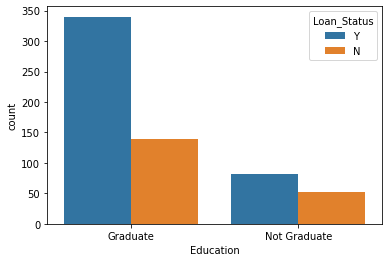

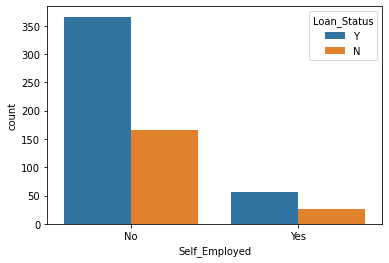

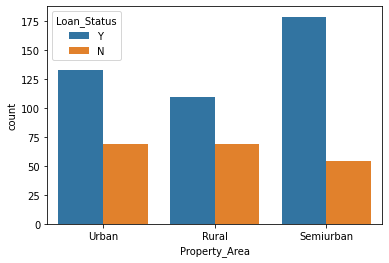

In [25]:
sns.countplot(df['Gender'], hue=df['Loan_Status'])
plt.show()

sns.countplot(df['Dependents'], hue=df['Loan_Status'])
plt.show()

sns.countplot(df['Education'], hue=df['Loan_Status'])
plt.show()

sns.countplot(df['Self_Employed'], hue=df['Loan_Status'])
plt.show()

sns.countplot(df['Property_Area'], hue=df['Loan_Status'])
plt.show()

#### Correlation Analysis

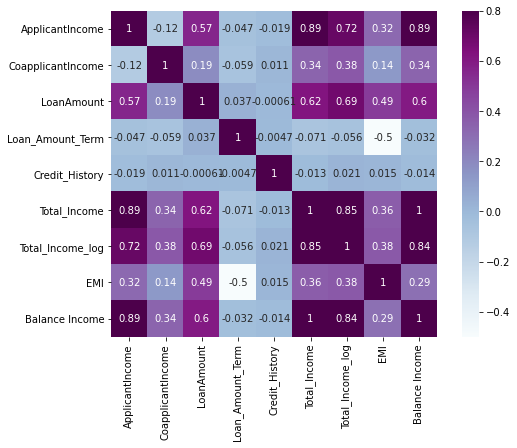

In [26]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, vmax=.8, annot=True, square=True, cmap="BuPu");

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log,EMI,Balance Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699515,0.391667,5608.333333


In [28]:
## drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' ,'Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns = cols , axis = 1)

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_log,EMI,Balance Income
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505323,0.333333,4607.666667
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,0.391667,5608.333333


#### Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']

In [32]:
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_log,EMI,Balance Income
0,1,0,0,0,0,1.0,2,1,8.674026,0.355556,5493.444444
1,1,1,1,0,0,1.0,0,0,8.714568,0.355556,5735.444444
2,1,1,0,0,1,1.0,2,1,8.006368,0.183333,2816.666667
3,1,1,0,1,0,1.0,2,1,8.505323,0.333333,4607.666667
4,1,0,0,0,0,1.0,2,1,8.699515,0.391667,5608.333333


#### Train test split

In [34]:
X = df.drop(columns = ['Loan_Status'],axis =1)

In [35]:
y = df['Loan_Status']

In [52]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Model Building

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
def classify(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy is ", model.score(x_test,y_test)*100)
    score=cross_val_score(model,x,y,cv=5)
    print("Cross validation is ," ,np.mean(score)*100)

#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

Accuracy is  77.27272727272727
Cross validation is , 80.9462881514061


#### DecisionTree

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

Accuracy is  73.37662337662337
Cross validation is , 71.33546581367453


#### Randomforest

In [41]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,X,y)

Accuracy is  76.62337662337663
Cross validation is , 78.67119818739171


#### HYPERPARAMETER TUNING:

In [42]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7,max_features=1)
classify(model, X,y)

Accuracy is  76.62337662337663
Cross validation is , 79.96934559509529


In [43]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm = confusion_matrix(y_pred,y_test)

In [45]:
cm

array([[22,  8],
       [32, 92]])

<AxesSubplot:>

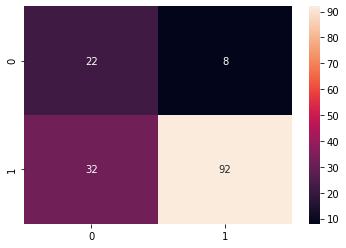

In [46]:
sns.heatmap(cm,annot=True)

#### Model Saving

In [48]:
import joblib
joblib.dump(model,'Loanpridiction.pkl')

['Loanpridiction.pkl']

In [49]:
# loading the saved model
smodel=joblib.load('Loanpridiction.pkl')

In [54]:
pridiction=smodel.predict(x_test)